In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import requests
sns.set()

In [2]:
df_raw = pd.read_csv(filepath_or_buffer='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=NGDJ9WMDJ0OVNN3P&datatype=csv')
df = df_raw.copy()
df.head()

,timestamp,open,high,low,close,volume
0,2019-09-26,219.94,220.93,218.8300,220.365,7825330
1,2019-09-25,218.55,221.50,217.1402,221.030,21417645
2,2019-09-24,221.03,222.49,217.1900,217.680,31190800
3,2019-09-23,218.95,219.84,217.6500,218.720,19165500
4,2019-09-20,221.38,222.56,217.4700,217.730,55413100


In [3]:
df = df.sort_values(by='timestamp')
df.head()

,timestamp,open,high,low,close,volume
99,2019-05-07,205.8800,207.417,200.825,202.86,38763700
98,2019-05-08,201.8958,205.340,201.750,202.90,26339500
97,2019-05-09,200.3916,201.680,196.660,200.72,34908600
96,2019-05-10,197.4190,198.844,192.770,197.18,41208700
95,2019-05-13,187.7167,189.480,182.850,185.72,57430600


In [4]:
number_simulation = 100
predict_days = 30

In [5]:
return_rate = pd.DataFrame(df['close']).pct_change()
return_rate.head()

,close
99,NaN
98,0.000197
97,-0.010744
96,-0.017637
95,-0.058119


In [6]:
avg_return_rate = return_rate.mean()
avg_return_rate

close    0.000981
dtype: float64

In [7]:
var_return_rate = return_rate.var()
var_return_rate

close    0.00029
dtype: float64

In [8]:
stdev_return_rate = return_rate.std()
stdev_return_rate

close    0.017027
dtype: float64

In [9]:
drift = (avg_return_rate - (var_return_rate / 2)) - 0.5 * stdev_return_rate ** 2
drift

close    0.000691
dtype: float64

In [10]:
last_close_price = df['close'].iloc[-1]
last_close_price

220.365

In [11]:
simulation = pd.DataFrame()

In [12]:
for i in tqdm(range(number_simulation)):
    price_list = []
    price_list.append(last_close_price)
    for day in range(predict_days): 
        shock = [drift + stdev_return_rate * np.random.normal()]
        shock = np.mean(shock)
        price = price_list[-1] * np.exp(shock)
        price_list.append(price)
    simulation[i] = price_list
price_list[:5]

100%|██████████| 100/100 [00:01<00:00, 71.66it/s]


[220.365,
 215.02160018942558,
 209.28841550214258,
 202.36267645079303,
 203.94149042591397]

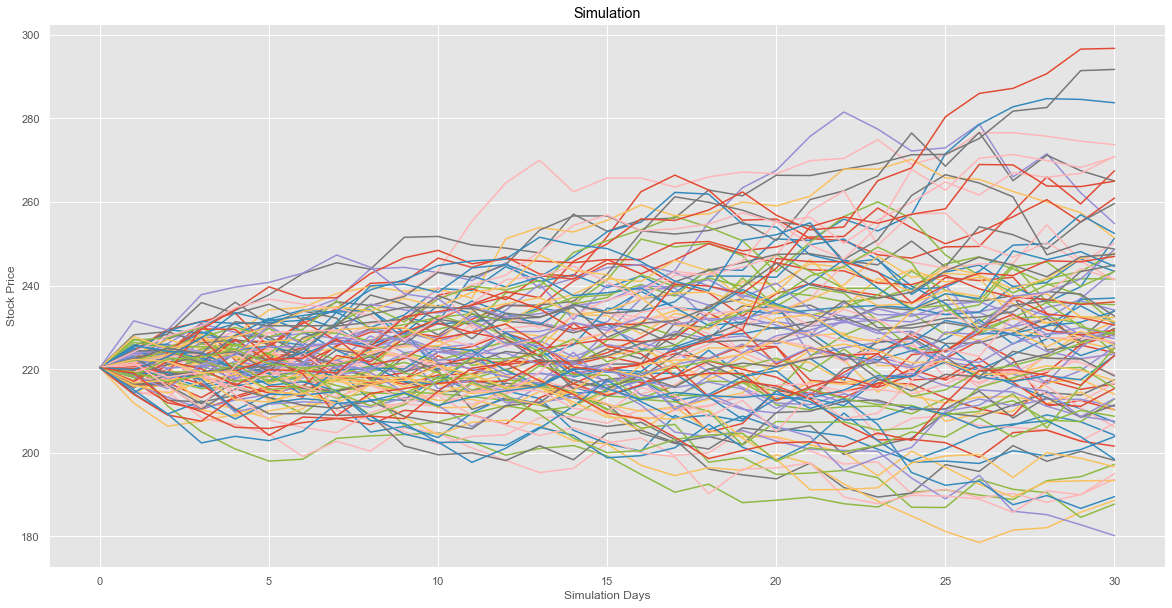

In [13]:
plt.style.use(['ggplot'])
plt.figure(figsize=(20,10))
plt.plot(simulation)
plt.title('Simulation', color='black')
plt.ylabel('Stock Price')
plt.xlabel('Simulation Days')
plt.show()

In [14]:
simulation_ravel = simulation.values.ravel()
simulation_ravel.sort()

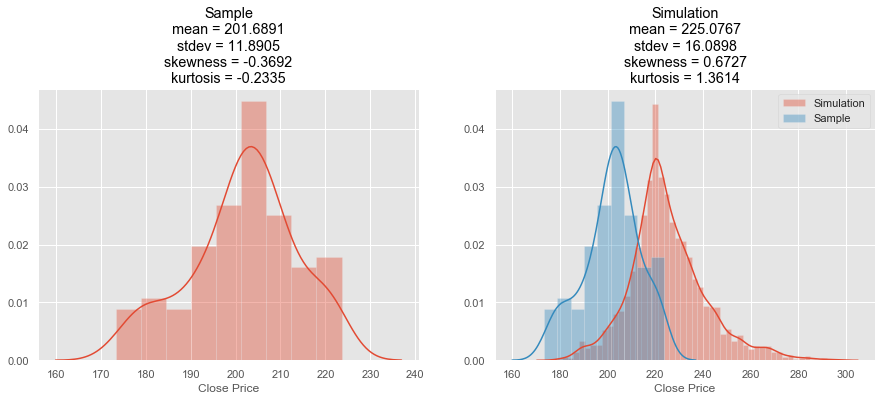

In [15]:
plt.style.use(['ggplot'])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['close'],norm_hist=True)
plt.title('Sample\nmean = {:.4f}\nstdev = {:.4f}\nskewness = {:.4f}\nkurtosis = {:.4f}'
      .format(df['close'].mean(), 
              df['close'].std(), 
              df['close'].skew(), 
              df['close'].kurtosis()), color='black')
plt.xlabel('Close Price')

plt.subplot(1,2,2)
sns.distplot(simulation_ravel,norm_hist=True,label='Simulation')
sns.distplot(df['close'],norm_hist=True,label='Sample')
plt.title('Simulation\nmean = {:.4f}\nstdev = {:.4f}\nskewness = {:.4f}\nkurtosis = {:.4f}'
      .format(simulation_ravel.mean(), 
              simulation_ravel.std(), 
              stats.skew(simulation_ravel), 
              stats.kurtosis(simulation_ravel)), color='black')
plt.xlabel('Close Price')

plt.legend()
plt.show()

----

In [1]:
# Confidence Interval and Hypothesis Testing between two distributions